In [1]:
from importlib import reload

import io
import pathlib
import numpy as np
import pandas as pd

import fitsio
import matplotlib.pyplot as plt
import pyds9

In [42]:
from ics.hxutils import hxstack as hx
from ics.hxutils import hxdisplay
from ics.hxutils import nirander
reload(hx)

cam = 'n1'

2020-05-11 12:57:23.605Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fa564589d50>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [67]:
d1 = pyds9.DS9('disp1', start=True)
d2 = pyds9.DS9('disp2', start=True)


# FFT

In [162]:
128

2048

In [160]:
chanW = 128
r1_full = hx.rampCds(17543, r1=1)
r1 = r1_full[100:3800, chanW*16+1:chanW*17+1].astype('f8')
print(r1.shape)
r1 = r1.flatten()
r1 = np.atleast_2d(r1)
r1.shape

(3700, 128)


(1, 473600)

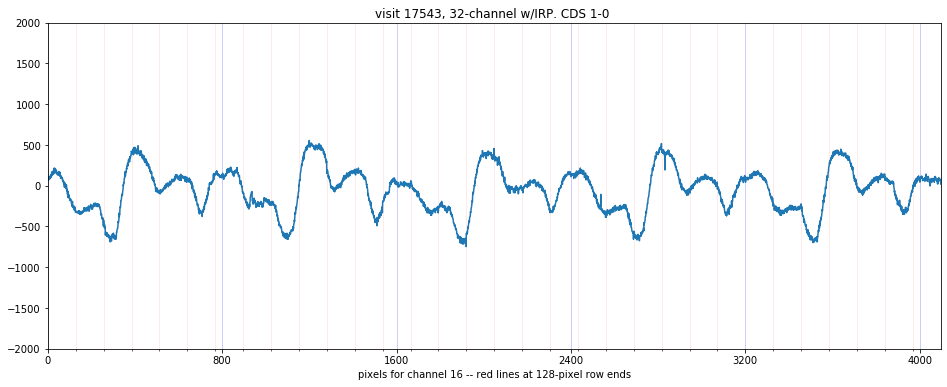

In [171]:
f,p1 =  plt.subplots(figsize=(16,6))
def 
p1.plot(r1.flatten())
xrange = np.array([0,4096]) + 4096*0
xmin,xmax= xrange[0], xrange[1]
p1.set_xlim(xmin,xmax)
p1.set_ylim(-2000,2000)
p1.set_xticks(np.arange(xmin, xmax, 128), minor=True)
p1.set_xticks(np.arange(xmin, xmax, 800))
p1.grid(axis='x', which='major', color='blue', alpha=0.25)
p1.grid(axis='x', which='minor', color='red', alpha=0.1)
p1.set_xlabel('pixels for channel 16 -- red lines at 128-pixel row ends')
p1.set_title('visit 17543, 32-channel w/IRP. CDS 1-0 ')
pll.grid()

In [93]:
segs = np.array([np.fft.fft(r) for r in r1])
f_n = segs.shape[-1]
fft_n = f_n//2
xf = np.fft.fftfreq(f_n, 1e-5)
print(fft_n)

234950


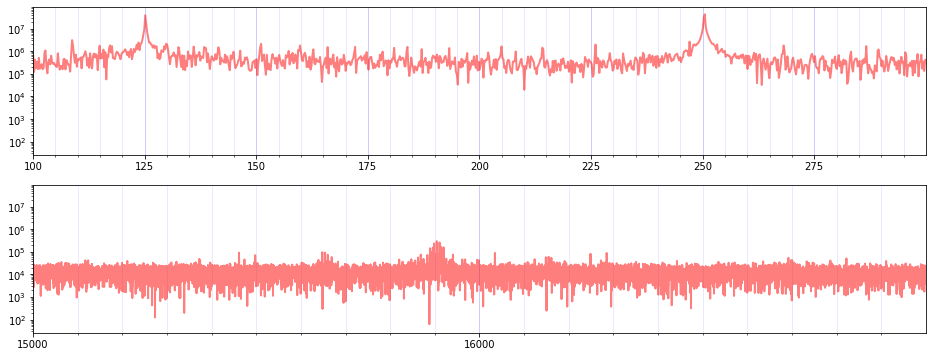

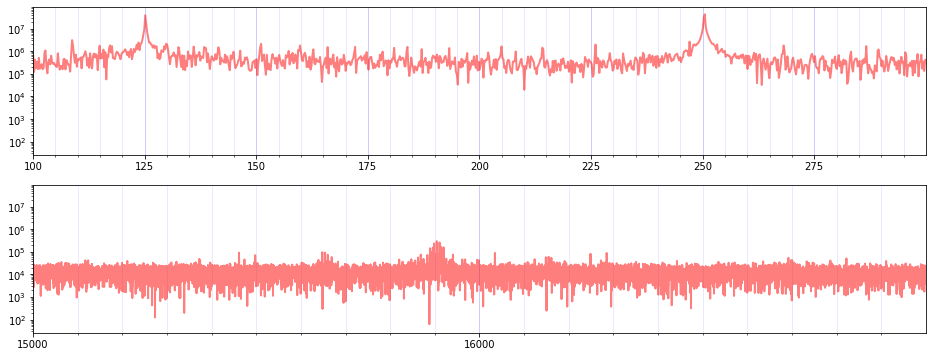

In [167]:
plt.close('all')
f, pl = plt.subplots(nrows=2, figsize=(16,6))
p1,p2 = pl
for s in segs[:]:
    p1.semilogy(xf[:fft_n], np.abs(s)[:fft_n], alpha=0.002, color='k')
    p2.semilogy(xf[:fft_n], np.abs(s)[:fft_n], alpha=0.002, color='k')
p1.semilogy(xf[:fft_n], np.median(np.abs(segs)[:,:fft_n], axis=0), alpha=0.5, linewidth=2.0, color='r')
p2.semilogy(xf[:fft_n], np.median(np.abs(segs)[:,:fft_n], axis=0), alpha=0.5, linewidth=2.0, color='r')

xmin,xmax = 100,300
p1.set_xlim(xmin, xmax)
p1.set_xticks(np.arange(xmin, xmax, 5), minor=True)
p1.set_xticks(np.arange(xmin, xmax, 25))
p1.grid(axis='x', which='major', color='blue', alpha=0.25)
p1.grid(axis='x', which='minor', color='blue', alpha=0.1)

xmin,xmax = 15000,17000
p2.set_xlim(xmin, xmax)
p2.set_xticks(np.arange(xmin, xmax, 100), minor=True)
p2.set_xticks(np.arange(xmin, xmax, 1000))
p2.grid(axis='x', which='major', color='blue', alpha=0.25)
p2.grid(axis='x', which='minor', color='blue', alpha=0.1)
f

In [73]:
r1 = hx.rampCds(17579)
r2 = hx.rampCds(17580)

In [82]:
d2.set_np2arr(r1)

1

In [173]:
hxdisplay.imShow(hx.rampPath(visit=18480),r0=0,display=d1)#,showAll=True)

In [6]:
badMask = fitsio.read('/data/redux/n1/calibs/mask-009000-n1.fits').astype('bool')
dark = nirander.nirButler.get('dark', visit=13108)
hxCalib = hx.HxCalib(cam=cam, darkStack=dark, badMask=badMask)

2020-05-10 20:26:09.007Z butler           10 butler.py:254 loading dark from /data/redux/n1/calibs/dark-013108-n1.fits, using <function load at 0x7fa56465ed40>


In [176]:
b = nirander.nirButler

root = pathlib.Path('/data/pfsx')
nightDir = root / '2020-05-12'
files = sorted(nightDir.glob('PFJB*.fits'))
for ramp_i, rampPath in enumerate(files):
    try:
        ramp = hx.ramp(rampPath)
        nreads = len(ramp)-1
        hdr = fitsio.read_header(rampPath)
        hdr.add_record(dict(name='W_HNREAD', value=nreads, comment='number of reads in ramp'))
        cds = hx.rampCds(ramp)
        parts = list(rampPath.parts)
        parts[-1] = 'PFJA' + parts[-1][4:]
        newPath = pathlib.Path(*parts)
        print(ramp_i, len(files), newPath, nreads, len(hdr), cds.shape, cds.dtype)
        fitsio.write(newPath, data=cds,extname='IMAGE',header=hdr,clobber=True)
    except Exception as e:
        print(f"skipping {rampPath}: {e}")

0 546 /data/pfsx/2020-05-12/PFJA01829113.fits 3 213 (4096, 4096) float32
1 546 /data/pfsx/2020-05-12/PFJA01829213.fits 3 213 (4096, 4096) float32
2 546 /data/pfsx/2020-05-12/PFJA01829313.fits 3 213 (4096, 4096) float32
3 546 /data/pfsx/2020-05-12/PFJA01829413.fits 3 213 (4096, 4096) float32
4 546 /data/pfsx/2020-05-12/PFJA01829513.fits 3 213 (4096, 4096) float32
5 546 /data/pfsx/2020-05-12/PFJA01829613.fits 3 213 (4096, 4096) float32
6 546 /data/pfsx/2020-05-12/PFJA01829713.fits 3 213 (4096, 4096) float32
7 546 /data/pfsx/2020-05-12/PFJA01829813.fits 3 213 (4096, 4096) float32
8 546 /data/pfsx/2020-05-12/PFJA01829913.fits 3 213 (4096, 4096) float32
9 546 /data/pfsx/2020-05-12/PFJA01830013.fits 3 213 (4096, 4096) float32
10 546 /data/pfsx/2020-05-12/PFJA01830113.fits 3 213 (4096, 4096) float32
11 546 /data/pfsx/2020-05-12/PFJA01830213.fits 3 213 (4096, 4096) float32
12 546 /data/pfsx/2020-05-12/PFJA01830313.fits 3 213 (4096, 4096) float32
13 546 /data/pfsx/2020-05-12/PFJA01830413.fits 3


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                    8 / array data type
NAXIS   =                    0 / number of array dimensions
EXTEND  =                    T / 
EXPTIME =             31.45728 / 
IMAGETYP= 'TEST'               / 

In [7]:
d1.set_np2arr(hxCalib.isr(visit=8316))

1

In [ ]:
from pfs.utils import butler
reload(butler)

from ics.hxutils import butlerMaps
reload(butlerMaps)

b = butler.Butler(configRoot='/data/pfsx/config')
b.addMaps(dataMapDict=butlerMaps.dataMap)
b.addKeys(butlerMaps.configKeys)
b.addKeys(dict(cam='n1', experimentName='n1_dither_newmask_2'))
b.addKeys(dict(reduxDir=b.get('reduxDir')))

In [ ]:
b.getPath('dither', wave=1085,row=2000,focus=122,visit=13390)

In [ ]:
d1.set_np2arr(bkgndMask)